# Starbucks Nutrition: Crafting a story from a Dataset

In [83]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import numpy as np
from sb_utils import save_file


In [191]:
# Load the dataset


starbucks_drinks = pd.read_csv("starbucks_drinkMenu_expanded_ver2.csv")
starbucks_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Beverage_size (fl oz),Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,8,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,12,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,16,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,20,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,8,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [192]:
starbucks_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Beverage_size (fl oz)      242 non-null    int64  
 4   Calories                   242 non-null    int64  
 5    Total Fat (g)             242 non-null    float64
 6   Trans Fat (g)              242 non-null    float64
 7   Saturated Fat (g)          242 non-null    float64
 8    Sodium (mg)               242 non-null    int64  
 9    Total Carbohydrates (g)   242 non-null    int64  
 10  Cholesterol (mg)           242 non-null    int64  
 11   Dietary Fibre (g)         242 non-null    int64  
 12   Sugars (g)                242 non-null    int64  
 13   Protein (g)               242 non-null    float64

In [57]:
starbucks_drinks['Caffeine (mg)'].value_counts()

75        37
0         35
150       34
70        14
varies    12
95        11
Varies    10
110        9
130        7
25         6
120        6
90         5
175        4
20         3
125        3
10         3
145        3
50         3
100        3
140        3
55         3
80         3
180        3
85         3
30         3
15         3
170        3
165        2
410        1
235        1
330        1
225        1
260        1
300        1
65         1
105        1
Name: Caffeine (mg), dtype: int64

In [193]:
for i, row in starbucks_drinks.iterrows():
    if row['Caffeine (mg)'] == 'varies' or row['Caffeine (mg)'] == 'Varies':
        starbucks_drinks.loc[i, 'Caffeine (mg)'] = np.NaN
        
starbucks_drinks = starbucks_drinks[starbucks_drinks['Caffeine (mg)'].notna()]
starbucks_drinks.shape


(220, 19)

In [194]:
object_cols = ['Beverage_category', 'Beverage', 'Beverage_prep', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',\
               ' Calcium (% DV) ', 'Iron (% DV) ']

for col in starbucks_drinks.columns:
    if col not in object_cols:
        starbucks_drinks[col] = starbucks_drinks[col].astype(float)



In [195]:
for i, row in starbucks_drinks.iterrows():
    if row[' Sugars (g)'] >= (row['Beverage_size (fl oz)']*12/8) :
        starbucks_drinks.loc[i, 'added_sugars_estimate (g)'] = np.around(row[' Sugars (g)'] - \
                                                          row['Beverage_size (fl oz)']*12/8, 2)
    else:
        starbucks_drinks.loc[i, 'added_sugars_estimate (g)'] = 0
        
starbucks_drinks.describe()

,Beverage_size (fl oz),Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg),added_sugars_estimate (g)
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,14.977273,201.077273,3.065455,1.390909,0.039091,6.636364,136.863636,37.209091,0.840909,34.004545,7.270455,89.522727,13.700000
std,4.946696,102.396393,2.996998,1.682385,0.072899,8.813364,80.777554,20.919326,1.438911,19.954857,4.792907,64.578892,13.425288
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,120.000000,0.200000,0.100000,0.000000,0.000000,80.000000,21.000000,0.000000,18.750000,4.000000,50.000000,0.750000
50%,16.000000,190.000000,2.500000,0.500000,0.000000,5.000000,127.500000,36.000000,0.000000,33.000000,6.000000,75.000000,10.000000
75%,20.000000,270.000000,5.000000,2.000000,0.100000,10.000000,180.000000,53.000000,1.000000,44.000000,10.000000,141.250000,23.000000
max,24.000000,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,410.000000,53.000000


In [70]:
starbucks_drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep',
       'Beverage_size (fl oz)', 'Calories', ' Total Fat (g)', 'Trans Fat (g) ',
       'Saturated Fat (g)', ' Sodium (mg)', ' Total Carbohydrates (g) ',
       'Cholesterol (mg)', ' Dietary Fibre (g)', ' Sugars (g)',
       ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)',
       'added_sugars_estimate (g)'],
      dtype='object')

In [196]:
def rating_calories(value):
    if value > 400:
        return 'red'
    elif value > 200:
        return 'amber'
    else:
        return 'green'

def rating_fat(value):
    if value > 15.6:
        return 'red'
    elif value > 7.8:
        return 'amber'
    else:
        return 'green'

def rating_sugars(value):
    if value > 10:
        return 'red'
    elif value > 5:
        return 'amber'
    else:
        return 'green'

def rating_caffeine(value):
    if value > 200:
        return 'red'
    elif value > 100:
        return 'amber'
    else:
        return 'green'

def rating_cholesterol(value):
    if value > 60:
        return 'red'
    elif value > 30:
        return 'amber'
    else:
        return 'green'

starbucks_drinks['rating_calories'] = starbucks_drinks['Calories'].map(rating_calories)
starbucks_drinks['rating_caffeine'] = starbucks_drinks['Caffeine (mg)'].map(rating_caffeine)
starbucks_drinks['rating_total_fat'] = starbucks_drinks[' Total Fat (g)'].map(rating_fat)
starbucks_drinks['rating_added_sugars'] = starbucks_drinks['added_sugars_estimate (g)'].map(rating_sugars)
starbucks_drinks['rating_cholesterol'] = starbucks_drinks['Cholesterol (mg)'].map(rating_cholesterol)


In [197]:
starbucks_drinks.tail(20)

,Beverage_category,Beverage,Beverage_prep,Beverage_size (fl oz),Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),...,Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),added_sugars_estimate (g),rating_calories,rating_caffeine,rating_total_fat,rating_added_sugars,rating_cholesterol
222,Frappuccino® Light Blended Coffee,Mocha,Venti Nonfat Milk,24.0,210.0,1.0,0.5,0.0,5.0,280.0,...,0%,15%,10%,130.0,6.0,amber,amber,green,amber,amber
223,Frappuccino® Light Blended Coffee,Caramel,Tall Nonfat Milk,12.0,100.0,0.1,0.0,0.0,0.0,140.0,...,0%,8%,0%,65.0,5.0,green,green,green,green,green
224,Frappuccino® Light Blended Coffee,Caramel,Grande Nonfat Milk,16.0,150.0,0.1,0.1,0.0,0.0,200.0,...,0%,10%,0%,90.0,8.0,green,green,green,amber,amber
225,Frappuccino® Light Blended Coffee,Caramel,Venti Nonfat Milk,24.0,200.0,0.1,0.1,0.0,5.0,270.0,...,0%,15%,2%,120.0,7.0,green,amber,green,amber,amber
226,Frappuccino® Light Blended Coffee,Java Chip,Tall Nonfat Milk,12.0,150.0,3.0,2.0,0.0,0.0,170.0,...,0%,10%,20%,70.0,9.0,green,green,green,amber,green
227,Frappuccino® Light Blended Coffee,Java Chip,Grande Nonfat Milk,16.0,220.0,4.0,3.0,0.0,0.0,240.0,...,0%,10%,25%,105.0,15.0,amber,amber,green,red,amber
228,Frappuccino® Light Blended Coffee,Java Chip,Venti Nonfat Milk,24.0,290.0,5.0,4.0,0.0,5.0,320.0,...,0%,15%,35%,165.0,16.0,amber,amber,green,red,amber
229,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Tall Nonfat Milk,12.0,170.0,0.1,0.1,0.0,0.0,140.0,...,6%,10%,2%,0.0,20.0,green,green,green,red,amber
230,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Whole Milk,12.0,190.0,3.0,1.5,0.1,10.0,140.0,...,6%,10%,2%,0.0,19.0,green,green,green,red,amber
231,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,12.0,170.0,1.5,0.2,0.0,0.0,135.0,...,6%,10%,6%,0.0,17.0,green,green,green,red,amber


In [198]:
starbucks_drinks.shape

(220, 25)

In [178]:


save_file(starbucks_drinks, "starbucks_drinkMenu_expanded_analysis.csv", ".")


A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  ".\starbucks_drinkMenu_expanded_analysis.csv"


In [211]:
def count_ratings(df, rating_type):
    counter = dict.fromkeys(df.columns)
    
    for col in df.columns:
        counter[col] = np.where(df[col] == rating_type, 1, 0)
    df_total_count = pd.DataFrame(counter)
    df_total_count['total'] = df_total_count.sum(axis=1)
   
    
    return np.array(df_total_count['total'])


In [217]:
rating_cols = ['rating_calories', 'rating_caffeine', 'rating_total_fat', 'rating_added_sugars', 'rating_cholesterol']

starbucks_drinks['count_green'] = count_ratings(starbucks_drinks[rating_cols], 'green')
starbucks_drinks['count_amber'] = count_ratings(starbucks_drinks[rating_cols], 'amber')
starbucks_drinks['count_red'] = count_ratings(starbucks_drinks[rating_cols], 'red')

starbucks_drinks['star_rating'] = np.where(starbucks_drinks['count_red'] > 0, 0, starbucks_drinks['count_green'])




In [218]:
starbucks_drinks.tail(5)

,Beverage_category,Beverage,Beverage_prep,Beverage_size (fl oz),Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),...,added_sugars_estimate (g),rating_calories,rating_caffeine,rating_total_fat,rating_added_sugars,rating_cholesterol,count_green,count_amber,count_red,star_rating
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,24.0,320.0,3.2,0.4,0.0,0.0,250.0,...,28.0,amber,green,green,red,red,2,1,2,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,12.0,170.0,0.1,0.1,0.0,0.0,160.0,...,20.0,green,green,green,red,amber,3,1,1,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,12.0,200.0,3.5,2.0,0.1,10.0,160.0,...,20.0,green,green,green,red,amber,3,1,1,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,12.0,180.0,1.5,0.2,0.0,0.0,160.0,...,17.0,green,green,green,red,amber,3,1,1,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,16.0,240.0,0.1,0.1,0.0,5.0,230.0,...,31.0,amber,green,green,red,amber,2,2,1,0


In [293]:
save_file(starbucks_drinks, "starbucks_drinkMenu_expanded_analysis.csv", ".")

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  ".\starbucks_drinkMenu_expanded_analysis.csv"


In [223]:
star_rating_counts.columns

Int64Index([0, 5, 4, 3, 2, 1], dtype='int64')

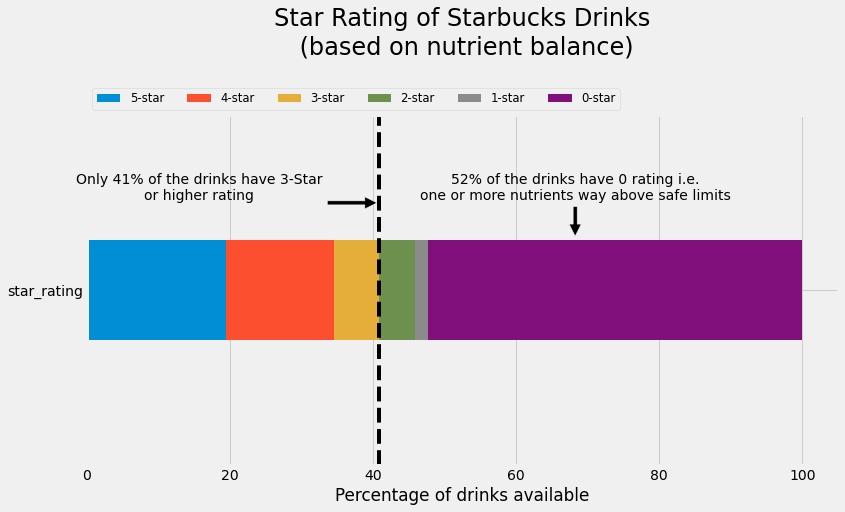

In [291]:
plt.style.use('fivethirtyeight')

star_rating_counts = pd.DataFrame(starbucks_drinks['star_rating'].value_counts()*100/starbucks_drinks.shape[0]).T
star_rating_counts = star_rating_counts[[5,4,3,2,1,0]]
star_rating_counts.columns = ['5-star','4-star','3-star','2-star','1-star','0-star']

fig, ax = plt.subplots(1,1, figsize=(12,6))
star_rating_counts.plot.barh(stacked=True, width = 0.2, ax=ax)

ax.set_xlabel('Percentage of drinks available')
ax.set_title('Star Rating of Starbucks Drinks\n (based on nutrient balance)\n\n', fontsize = 24)
ax.axvline(40.91, linestyle = "--", color='black')
ax.annotate("Only 41% of the drinks have 3-Star\nor higher rating", xy=(0.39, 0.75),  xycoords='axes fraction', xytext=(0.15, 0.75), \
            textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
            verticalalignment='bottom')

ax.annotate("52% of the drinks have 0 rating i.e.\none or more nutrients way above safe limits", \
            xy=(0.65, 0.65),  xycoords='axes fraction', xytext=(0.65, 0.75), \
            textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
            verticalalignment='bottom')

ax.legend(ncol=6, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')



plt.show()


In [264]:
def size_map(value):
    if value == 24:
        return 'Venti-Cold'
    elif value == 20:
        return 'Venti-Hot'
    if value == 16:
        return 'Grande'
    if value == 12:
        return 'Tall'
    if value == 8:
        return 'Short'
        

starbucks_drinks['size_name'] = starbucks_drinks['Beverage_size (fl oz)'].map(size_map)
starbucks_drinks = starbucks_drinks[['Beverage_category', 'Beverage', 'Beverage_prep', 'Beverage_size (fl oz)', 'size_name', \
                    'Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)', \
                    ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)', ' Sugars (g)',\
                    ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ', \
                    'Caffeine (mg)', 'added_sugars_estimate (g)', 'rating_calories', 'rating_caffeine', 'rating_total_fat', \
                    'rating_added_sugars', 'rating_cholesterol', 'count_green', 'count_amber', 'count_red', 'star_rating']]

starbucks_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Beverage_size (fl oz),size_name,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),...,added_sugars_estimate (g),rating_calories,rating_caffeine,rating_total_fat,rating_added_sugars,rating_cholesterol,count_green,count_amber,count_red,star_rating
0,Coffee,Brewed Coffee,Short,8.0,Short,3.0,0.1,0.0,0.0,0.0,...,0.0,green,amber,green,green,green,4,1,0,4
1,Coffee,Brewed Coffee,Tall,12.0,Tall,4.0,0.1,0.0,0.0,0.0,...,0.0,green,red,green,green,green,4,0,1,0
2,Coffee,Brewed Coffee,Grande,16.0,Grande,5.0,0.1,0.0,0.0,0.0,...,0.0,green,red,green,green,green,4,0,1,0
3,Coffee,Brewed Coffee,Venti,20.0,Venti-Hot,5.0,0.1,0.0,0.0,0.0,...,0.0,green,red,green,green,green,4,0,1,0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,8.0,Short,70.0,0.1,0.1,0.0,5.0,...,0.0,green,green,green,green,green,5,0,0,5


In [292]:
size_rating_counts = pd.crosstab(starbucks_drinks['size_name'], starbucks_drinks['star_rating'])
#size_rating_counts = size_rating_counts *100 / size_rating_counts.sum(axis=1) 
#size_rating_counts.index = ['Short']
size_rating_counts = size_rating_counts[[5,4,3,2,1,0]]
size_rating_counts = size_rating_counts.reindex(['Venti-Cold', 'Venti-Hot', 'Grande', 'Tall', 'Short'])
size_rating_counts['total'] = size_rating_counts.sum(axis=1)

for col in size_rating_counts.columns[:-1]:
    size_rating_counts[str(col)+"-star"] = np.around(size_rating_counts[col] *100 / size_rating_counts['total'],2)

#size_rating_counts = size_rating_counts.drop(columns = [5,4,3,2,1,0,'total'])
size_rating_counts


star_rating,5,4,3,2,1,0,total,5-star,4-star,3-star,2-star,1-star,0-star
size_name,,,,,,,,,,,,,
Venti-Cold,0,0,4,1,1,17,23,0.00,0.00,17.39,4.35,4.35,73.91
Venti-Hot,0,6,2,4,1,21,34,0.00,17.65,5.88,11.76,2.94,61.76
Grande,3,11,4,6,2,40,66,4.55,16.67,6.06,9.09,3.03,60.61
Tall,20,7,4,0,0,30,61,32.79,11.48,6.56,0.00,0.00,49.18
Short,19,8,0,0,0,7,34,55.88,23.53,0.00,0.00,0.00,20.59


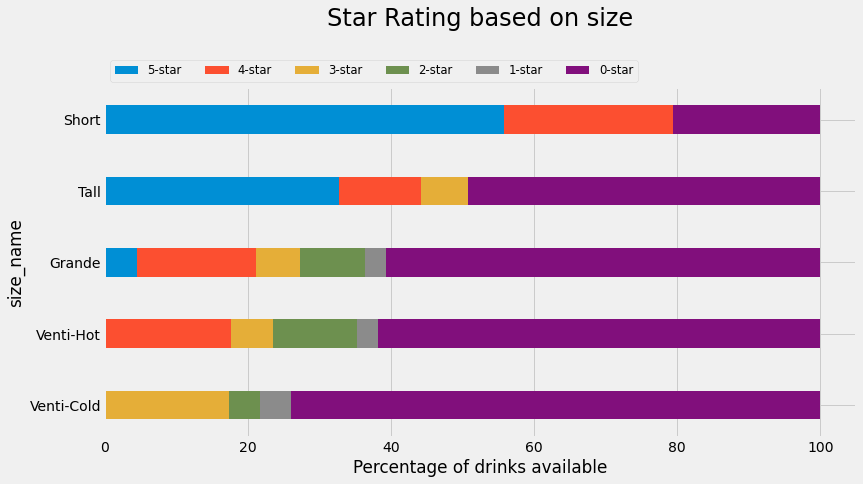

In [289]:

# Star rating by size

plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(1,1, figsize=(12,6))
size_rating_counts.plot.barh(stacked=True, width = 0.4, ax=ax)

ax.set_xlabel('Percentage of drinks available')
ax.set_title('Star Rating based on size\n\n', fontsize = 24)
#ax.axvline(40.91, linestyle = "--", color='black')
#ax.annotate("Only 41% of the drinks have 3-Star\nor higher rating", xy=(0.39, 0.75),  xycoords='axes fraction', xytext=(0.15, 0.75), \
 #           textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
  #          verticalalignment='bottom')

#ax.annotate("52% of the drinks have 0 rating i.e.\none or more nutrients way above safe limits", \
 #           xy=(0.65, 0.65),  xycoords='axes fraction', xytext=(0.65, 0.75), \
  #          textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
   #         verticalalignment='bottom')

ax.legend(ncol=6, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')



plt.show()

In [296]:
starbucks_drinks2 = pd.read_csv("starbucks_drinkMenu_expanded_analysis_ver3.csv")
starbucks_drinks2.head()

,Beverage_category,Beverage,beverage_type,Beverage_prep,preparation,Beverage_size (fl oz),size_name,Calories,Total Fat (g),Trans Fat (g),...,added_sugars_estimate (g),rating_calories,rating_caffeine,rating_total_fat,rating_added_sugars,rating_cholesterol,count_green,count_amber,count_red,star_rating
0,Coffee,Brewed Coffee,Hot Coffees,Short,No Milk,8,Short,3,0.1,0.0,...,0,green,amber,green,green,green,4,1,0,4
1,Coffee,Brewed Coffee,Hot Coffees,Tall,No Milk,12,Tall,4,0.1,0.0,...,0,green,red,green,green,green,4,0,1,0
2,Coffee,Brewed Coffee,Hot Coffees,Grande,No Milk,16,Grande,5,0.1,0.0,...,0,green,red,green,green,green,4,0,1,0
3,Coffee,Brewed Coffee,Hot Coffees,Venti,No Milk,20,Venti-Hot,5,0.1,0.0,...,0,green,red,green,green,green,4,0,1,0
4,Classic Espresso Drinks,Caffè Latte,Hot Coffees,Short Nonfat Milk,Nonfat Milk,8,Short,70,0.1,0.1,...,0,green,green,green,green,green,5,0,0,5


In [299]:
bev_type_ratings = pd.crosstab(starbucks_drinks2['beverage_type'], starbucks_drinks2['star_rating'])
#size_rating_counts = size_rating_counts *100 / size_rating_counts.sum(axis=1) 
#size_rating_counts.index = ['Short']
bev_type_ratings = bev_type_ratings[[5,4,3,2,1,0]]
bev_type_ratings = bev_type_ratings.reindex(['Iced Tea', 'Smoothies', 'Hot Drinks', 'Cold Coffees', 'Blended Coffees', 'Hot Teas', 'Hot Coffees'])
bev_type_ratings['total'] = bev_type_ratings.sum(axis=1)

for col in bev_type_ratings.columns[:-1]:
    bev_type_ratings[str(col)+"-star"] = np.around(bev_type_ratings[col] *100 / bev_type_ratings['total'],2)

#bev_type_ratings = size_rating_counts.drop(columns = [5,4,3,2,1,0,'total'])
bev_type_ratings

star_rating,5,4,3,2,1,0,total,5-star,4-star,3-star,2-star,1-star,0-star
beverage_type,,,,,,,,,,,,,
Iced Tea,0,1,0,0,0,0,1,0.00,100.00,0.00,0.00,0.00,0.00
Smoothies,0,0,0,2,0,6,8,0.00,0.00,0.00,25.00,0.00,75.00
Hot Drinks,0,2,1,1,0,24,28,0.00,7.14,3.57,3.57,0.00,85.71
Cold Coffees,4,4,3,0,0,1,12,33.33,33.33,25.00,0.00,0.00,8.33
Blended Coffees,4,1,3,1,1,51,61,6.56,1.64,4.92,1.64,1.64,83.61
Hot Teas,7,4,5,1,0,19,36,19.44,11.11,13.89,2.78,0.00,52.78
Hot Coffees,28,21,2,6,3,14,74,37.84,28.38,2.70,8.11,4.05,18.92


In [300]:
bev_type_ratings = pd.crosstab(starbucks_drinks2['beverage_type'], starbucks_drinks2['star_rating'])
#size_rating_counts = size_rating_counts *100 / size_rating_counts.sum(axis=1) 
#size_rating_counts.index = ['Short']
bev_type_ratings = bev_type_ratings[[5,4,3,2,1,0]]
bev_type_ratings = bev_type_ratings.reindex(['Iced Tea', 'Smoothies', 'Hot Drinks', 'Cold Coffees', 'Blended Coffees', 'Hot Teas', 'Hot Coffees'])
bev_type_ratings['total'] = bev_type_ratings.sum(axis=1)

for col in bev_type_ratings.columns[:-1]:
    bev_type_ratings[str(col)+"-star"] = np.around(bev_type_ratings[col] *100 / bev_type_ratings['total'],2)

bev_type_ratings = bev_type_ratings.drop(columns = [5,4,3,2,1,0,'total'])
bev_type_ratings

star_rating,5-star,4-star,3-star,2-star,1-star,0-star
beverage_type,,,,,,
Iced Tea,0.00,100.00,0.00,0.00,0.00,0.00
Smoothies,0.00,0.00,0.00,25.00,0.00,75.00
Hot Drinks,0.00,7.14,3.57,3.57,0.00,85.71
Cold Coffees,33.33,33.33,25.00,0.00,0.00,8.33
Blended Coffees,6.56,1.64,4.92,1.64,1.64,83.61
Hot Teas,19.44,11.11,13.89,2.78,0.00,52.78
Hot Coffees,37.84,28.38,2.70,8.11,4.05,18.92


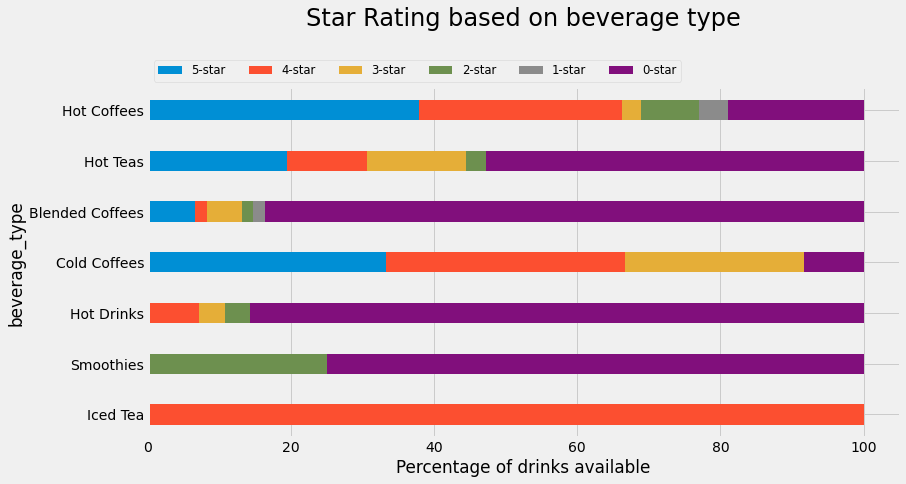

In [301]:
# Star rating by beverage type

plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(1,1, figsize=(12,6))
bev_type_ratings.plot.barh(stacked=True, width = 0.4, ax=ax)

ax.set_xlabel('Percentage of drinks available')
ax.set_title('Star Rating based on beverage type\n\n', fontsize = 24)
#ax.axvline(40.91, linestyle = "--", color='black')
#ax.annotate("Only 41% of the drinks have 3-Star\nor higher rating", xy=(0.39, 0.75),  xycoords='axes fraction', xytext=(0.15, 0.75), \
 #           textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
  #          verticalalignment='bottom')

#ax.annotate("52% of the drinks have 0 rating i.e.\none or more nutrients way above safe limits", \
 #           xy=(0.65, 0.65),  xycoords='axes fraction', xytext=(0.65, 0.75), \
  #          textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
   #         verticalalignment='bottom')

ax.legend(ncol=6, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')



plt.show()

In [303]:
prep_type_ratings = pd.crosstab(starbucks_drinks2['preparation'], starbucks_drinks2['star_rating'])
#size_rating_counts = size_rating_counts *100 / size_rating_counts.sum(axis=1) 
#size_rating_counts.index = ['Short']
prep_type_ratings = prep_type_ratings[[5,4,3,2,1,0]]
#prep_type_ratings = prep_type_ratings.reindex(['Iced Tea', 'Smoothies', 'Hot Drinks', 'Cold Coffees', 'Blended Coffees', 'Hot Teas', 'Hot Coffees'])
prep_type_ratings['total'] = prep_type_ratings.sum(axis=1)

for col in prep_type_ratings.columns[:-1]:
    prep_type_ratings[str(col)+"-star"] = np.around(prep_type_ratings[col] *100 / prep_type_ratings['total'],2)

#bev_type_ratings = size_rating_counts.drop(columns = [5,4,3,2,1,0,'total'])
prep_type_ratings


star_rating,5,4,3,2,1,0,total,5-star,4-star,3-star,2-star,1-star,0-star
preparation,,,,,,,,,,,,,
Nonfat Milk,0,0,1,0,0,0,1,0.00,0.00,100.00,0.00,0.00,0.00
2% Milk,11,7,3,3,1,21,46,23.91,15.22,6.52,6.52,2.17,45.65
No Milk,3,6,0,0,0,10,19,15.79,31.58,0.00,0.00,0.00,52.63
Nonfat Milk,15,11,6,2,2,40,76,19.74,14.47,7.89,2.63,2.63,52.63
Soymilk,14,9,4,6,1,28,62,22.58,14.52,6.45,9.68,1.61,45.16
Whole Milk,0,0,0,0,0,16,16,0.00,0.00,0.00,0.00,0.00,100.00


In [ ]:
# Star rating by beverage preparation

plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(1,1, figsize=(12,6))
bev_type_ratings.plot.barh(stacked=True, width = 0.4, ax=ax)

ax.set_xlabel('Percentage of drinks available')
ax.set_title('Star Rating based on beverage type\n\n', fontsize = 24)
#ax.axvline(40.91, linestyle = "--", color='black')
#ax.annotate("Only 41% of the drinks have 3-Star\nor higher rating", xy=(0.39, 0.75),  xycoords='axes fraction', xytext=(0.15, 0.75), \
 #           textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
  #          verticalalignment='bottom')

#ax.annotate("52% of the drinks have 0 rating i.e.\none or more nutrients way above safe limits", \
 #           xy=(0.65, 0.65),  xycoords='axes fraction', xytext=(0.65, 0.75), \
  #          textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
   #         verticalalignment='bottom')

ax.legend(ncol=6, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')



plt.show()

In [322]:

rating_cols = ['rating_cholesterol','rating_total_fat', 'rating_calories', 'rating_added_sugars', 'rating_caffeine']


gar_ratings = pd.DataFrame(starbucks_drinks['rating_cholesterol'].value_counts()*100/starbucks_drinks.shape[0]).T

for col in rating_cols[1:]:
    ratings = pd.DataFrame(starbucks_drinks[col].value_counts()*100/starbucks_drinks.shape[0]).T
    gar_ratings = pd.concat([gar_ratings, ratings], axis=0)

gar_ratings = gar_ratings[['green', 'amber', 'red']]
#gar_ratings = gar_ratings.reindex(['Total_Calories', 'Caffeine', 'Total_fat', 'Added_sugars', 'Cholesterol'])
gar_ratings

,green,amber,red
rating_cholesterol,39.090909,46.363636,14.545455
rating_total_fat,90.909091,9.090909,NaN
rating_calories,55.909091,40.909091,3.181818
rating_added_sugars,37.272727,14.090909,48.636364
rating_caffeine,61.818182,35.454545,2.727273


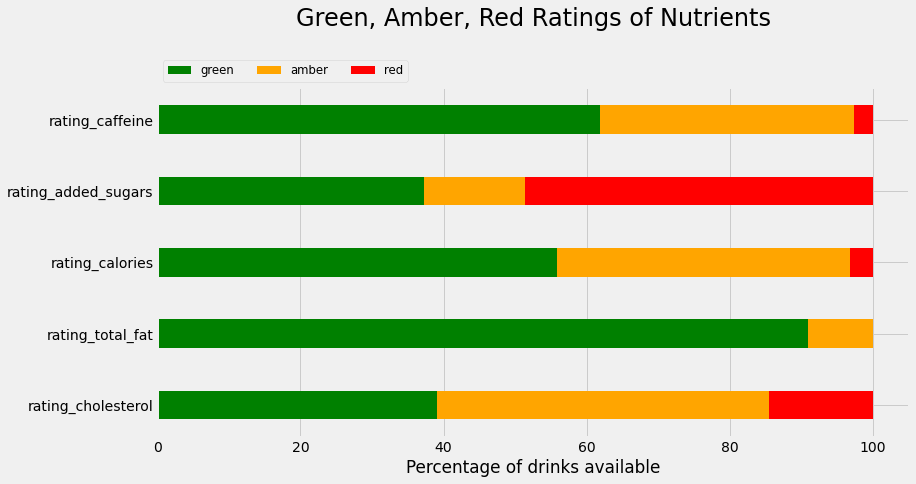

In [323]:
# Star rating by beverage type

plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(1,1, figsize=(12,6))
gar_ratings.plot.barh(stacked=True, width = 0.4, color = ['green', 'orange', 'red'],ax=ax)

ax.set_xlabel('Percentage of drinks available')
ax.set_title('Green, Amber, Red Ratings of Nutrients\n\n', fontsize = 24)
#ax.axvline(40.91, linestyle = "--", color='black')
#ax.annotate("Only 41% of the drinks have 3-Star\nor higher rating", xy=(0.39, 0.75),  xycoords='axes fraction', xytext=(0.15, 0.75), \
 #           textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
  #          verticalalignment='bottom')

#ax.annotate("52% of the drinks have 0 rating i.e.\none or more nutrients way above safe limits", \
 #           xy=(0.65, 0.65),  xycoords='axes fraction', xytext=(0.65, 0.75), \
  #          textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', \
   #         verticalalignment='bottom')

ax.legend(ncol=6, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')



plt.show()